In [1]:
# enable autoreload
%load_ext autoreload
%autoreload 2

# Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mephisto import Mephistogram, like

# 1D

## addition

(<Figure size 500x400 with 1 Axes>, <AxesSubplot:xlabel='the-axis'>)

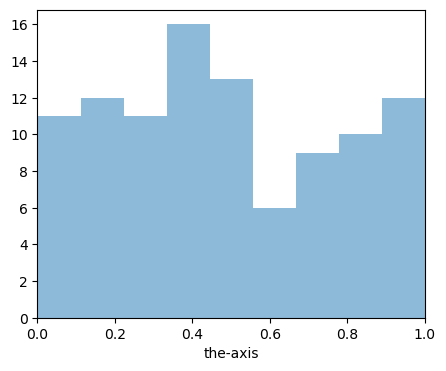

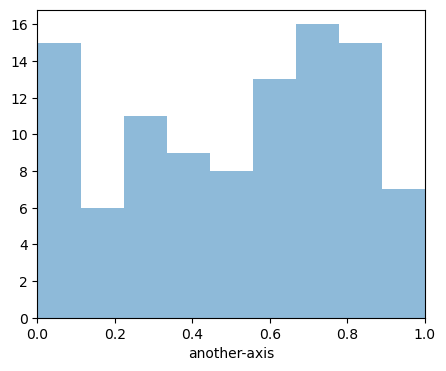

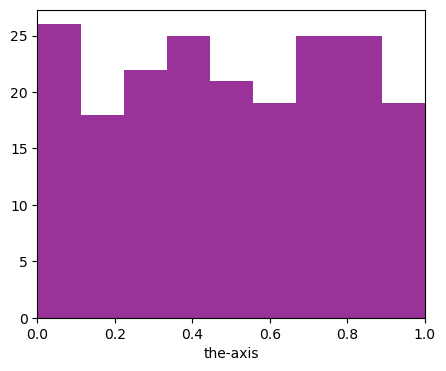

In [3]:
bins = np.linspace(0, 1, num=10)

nums = np.random.uniform(size=100)
h, xb = np.histogram(nums, bins=bins)
# give hist and bins directly to Mephistogram
m1 = Mephistogram(h, bins, axis_names="the-axis", make_hist=False)
m1.plot(alpha=0.5)

nums = np.random.uniform(size=100)
# use internal method to build the histogram
m2 = Mephistogram(nums, bins, axis_names="another-axis", make_hist=True)
m2.plot(alpha=0.5)

(m1+m2).plot(color="purple", alpha=0.8)

In [4]:
print(m1)

Mephistogram with 1 dimensions and shape (9,). Axis names are the-axis.
[11 12 11 16 13  6  9 10 12]


# 2D

## addition


Mephistogram with 2 dimensions and shape (9, 6). Axis names are ('x-axis', 'y-axis').
[[0. 6. 3. 3. 4. 2.]
 [2. 4. 6. 5. 1. 5.]
 [5. 7. 2. 3. 5. 2.]
 [4. 4. 3. 5. 5. 2.]
 [1. 6. 8. 4. 3. 5.]
 [3. 0. 6. 4. 3. 1.]
 [5. 4. 1. 3. 4. 3.]
 [8. 7. 1. 2. 5. 6.]
 [2. 2. 7. 4. 3. 1.]]


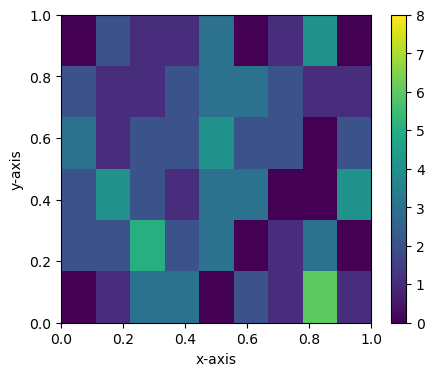

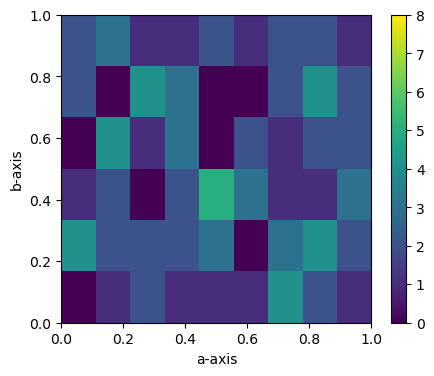

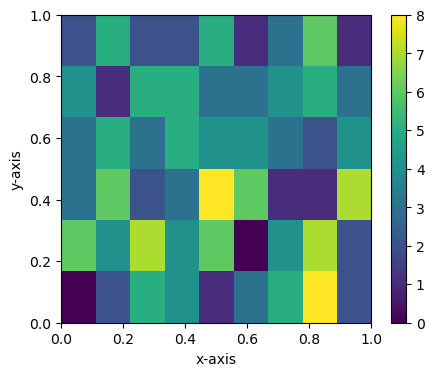

In [5]:
bins = (np.linspace(0, 1, num=10), np.linspace(0, 1, num=7))

nums = np.random.uniform(size=(2, 100))
h1, xb, yb = np.histogram2d(*nums, bins=bins)
mh1 = Mephistogram(h1, bins, ("x-axis", "y-axis"))

nums = np.random.uniform(size=(2, 100))
mh2 = Mephistogram(nums, bins, ("a-axis", "b-axis"), make_hist=True)
mh3 = mh1 + mh2

print(mh3)

mh1.plot(vmin=0, vmax=8)
plt.colorbar()
mh2.plot(vmin=0, vmax=8)
plt.colorbar()
mh3.plot(vmin=0, vmax=8)
plt.colorbar()

## matmul


Mephistogram with 2 dimensions and shape (9, 11). Axis names are ('x-axis', 'b-axis').
[[ 4. 14.  9.  6.  6.  4.  3.  9. 13. 12.  9.]
 [11. 27. 19. 16. 15. 10. 11. 22. 26. 26. 26.]
 [10. 36. 20. 29. 20. 15. 13. 29. 35. 29. 34.]
 [ 6. 20. 14. 15. 11.  9.  7. 15. 19. 15. 16.]
 [16. 38. 32. 29. 18. 19. 15. 23. 31. 35. 24.]
 [10. 18. 14. 10. 10.  8. 13. 16. 11. 15. 22.]
 [10. 22. 17. 19. 14. 11. 11. 19. 22. 22. 23.]
 [ 7. 27. 10. 23. 16. 11. 14. 26. 23. 18. 35.]
 [ 6. 22. 12. 16. 13.  8.  7. 19. 24. 19. 22.]]


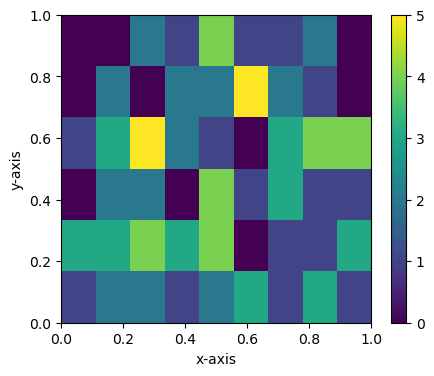

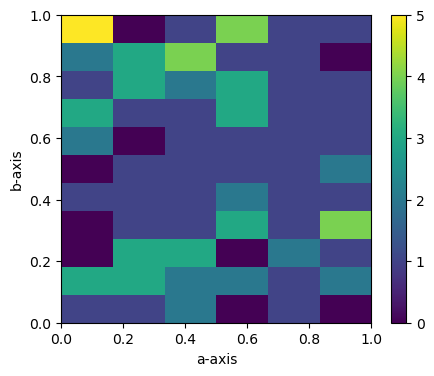

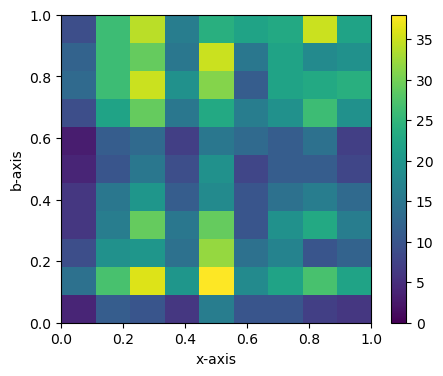

In [6]:
bins = (np.linspace(0, 1, num=10), np.linspace(0, 1, num=7))
nums = np.random.uniform(size=(2, 100))
h1, xb, yb = np.histogram2d(*nums, bins=bins)
mh1 = Mephistogram(h1, bins, ("x-axis", "y-axis"))

bins = (np.linspace(0, 1, num=7), np.linspace(0, 1, num=12))
nums = np.random.uniform(size=(2, 100))
h2, xb, yb = np.histogram2d(*nums, bins=bins)
mh2 = Mephistogram(h2, bins, ("a-axis", "b-axis"))
mh3 = mh1 @ mh2

print(mh3)

mh1.plot(vmin=0)
plt.colorbar()
mh2.plot(vmin=0)
plt.colorbar()
mh3.plot(vmin=0)
plt.colorbar()

## Transpose

Mephistogram with 2 dimensions and shape (9, 6). Axis names are ('x-axis', 'y-axis').
[[1. 3. 0. 1. 0. 0.]
 [2. 3. 2. 3. 2. 0.]
 [2. 4. 2. 5. 0. 2.]
 [1. 3. 0. 2. 2. 1.]
 [2. 4. 4. 1. 2. 4.]
 [3. 0. 1. 0. 5. 1.]
 [1. 1. 3. 3. 2. 1.]
 [3. 1. 1. 4. 1. 2.]
 [1. 3. 1. 4. 0. 0.]] Mephistogram with 2 dimensions and shape (6, 9). Axis names are ('y-axis', 'x-axis').
[[1. 2. 2. 1. 2. 3. 1. 3. 1.]
 [3. 3. 4. 3. 4. 0. 1. 1. 3.]
 [0. 2. 2. 0. 4. 1. 3. 1. 1.]
 [1. 3. 5. 2. 1. 0. 3. 4. 4.]
 [0. 2. 0. 2. 2. 5. 2. 1. 0.]
 [0. 0. 2. 1. 4. 1. 1. 2. 0.]]


(<Figure size 500x400 with 1 Axes>,
 <AxesSubplot:xlabel='y-axis', ylabel='x-axis'>)

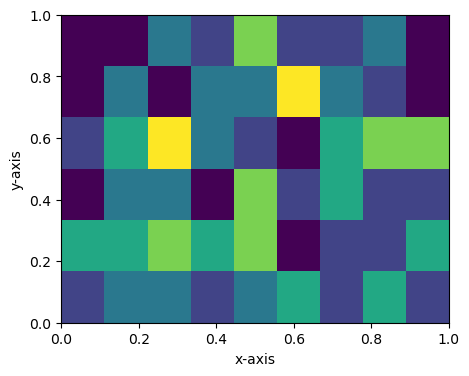

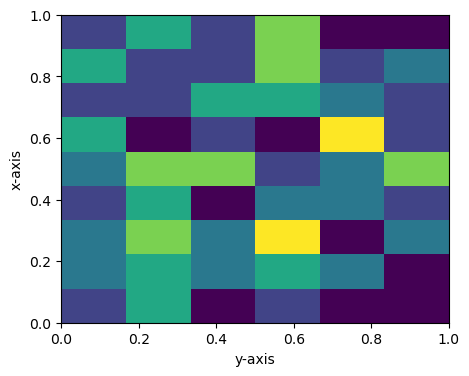

In [7]:
mhT = mh1.T()
print(mh1, mhT)

mh1.plot()
mhT.plot()

# other functionality

In [8]:
# dont raise error, just check
m1.match(mh2, verbose=False, raise_err=False)
# dont raise error, but print message
m1.match(mh2, verbose=True, raise_err=False)

Elementary arithmetic not possible. Shapes are (9,) and (6, 11);


False

In [9]:
# raise error
m1.match(mh2, raise_err=True)

ValueError: Elementary arithmetic not possible. Shapes are (9,) and (6, 11);

In [10]:
# example math operations
mh = Mephistogram(
    np.random.uniform(size=100), bins=np.linspace(0, 1, num=11), make_hist=True
)

print(mh)
print(-mh)
print(mh - 2)
print(2 - mh)
print(mh / 2)
print(15 / mh)

Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[ 8 12 12 12 13 10  8  7  9  9]
Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[ -8 -12 -12 -12 -13 -10  -8  -7  -9  -9]
Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[ 6 10 10 10 11  8  6  5  7  7]
Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[ -6 -10 -10 -10 -11  -8  -6  -5  -7  -7]
Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[4.  6.  6.  6.  6.5 5.  4.  3.5 4.5 4.5]
Mephistogram with 1 dimensions and shape (10,). Axis names are axis-0.
[1.875      1.25       1.25       1.25       1.15384615 1.5
 1.875      2.14285714 1.66666667 1.66666667]


In [11]:
# example comparisons
mh1 = Mephistogram(
    np.random.uniform(-1, 1, 10), bins=np.linspace(0, 1, num=11), make_hist=False
)
#like(mh1) builds a mephistogram like mh1, filled with given values (default is 0)
mh2 = like(mh1) + Mephistogram(
    np.random.uniform(-1, 1, 10), bins=np.linspace(0, 1, num=11), make_hist=False
)

print(mh1>mh2)


[ True False False  True  True  True False False False False]
